## Types of Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Houseprice_Bangalore.csv')
df.head()

,area,bedroom,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

### Batch gradient descent
- We go through all training samples and calculate cumulative error
- Now we back propogate and adjust the weights

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b           # w1*area + w2*bedroom + bias

    w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [6]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)

w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

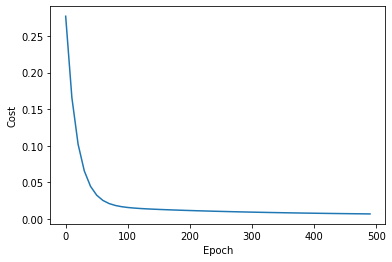

In [7]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)
plt.show()

In [8]:
def predict(area, bedroom, w, b):
  scaled_X = sx.transform([[area, bedroom]])[0]

  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

  return sy.inverse_transform([[scaled_price]])


In [9]:
predict(1170, 2, w, b)

array([[35.84913258]])

## Stochastic Gradient Descent
- Use one (randomly picked) training samples for one
forward pass and then adjust weights

In [10]:
import random

In [11]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b           # w1*area + w2*bedroom + bias

    w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples) * (sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [12]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 10000)

w_sgd, b_sgd, cost_sgd

(array([0.70840733, 0.67514498]), -0.23389165229824693, 0.005950716894194294)

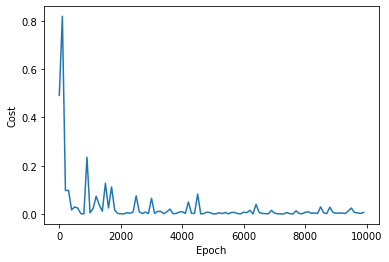

In [13]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [14]:
predict(2600, 4, w_sgd, b_sgd)

array([[128.14270542]])

## Mini Batch Gradient Descent
- Use a batch of (randomly picked) training samples for
a forward pass and then adjust weights

In [15]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index:random_index+5]
    sample_y = y_true[random_index:random_index+5]
    y_predicted = np.dot(w, sample_x.T) + b           # w1*area + w2*bedroom + bias

    w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples) * np.sum((sample_y - y_predicted))

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(sample_y - y_predicted))

    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list


In [16]:
w_mini_bgd, b_mini_bgd, cost_mini_bgd, cost_list_mini_bgd, epoch_list_mini_bgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0], ), 10000)

w_mini_bgd, b_mini_bgd, cost_mini_bgd

(array([0.68189355, 0.51692016]), -0.13887931570542708, 0.009770523167035184)

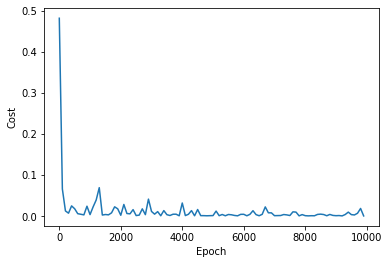

In [17]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_mini_bgd, cost_list_mini_bgd)
plt.show()

In [18]:
predict(2600, 4, w_mini_bgd, b_mini_bgd)

array([[122.7274351]])

## Difference between Batch Gradient Descent, Stochastic Gradient Descent (SGD) and Mini Batch Gradient Descent 

<table>
  <tr>
    <td align="center"><b>Batch Gradient Descent</b></td>
    <td align="center"><b>Stochastic Gradient Descent (SGD)</b></td>
    <td align="center"><b>Mini Batch Gradient Descent</b></td>
  </tr>
  <tr>
    <td>- Use all training samples for one forward pass and <br />then adjust weights</td>
    <td>- Use one (randomly picked) training samples for one <br />forward pass and then adjust weights</td>
    <td>- Use a batch of (randomly picked) training samples for<br /> a forward pass and then adjust weights</td>
  </tr>
  <tr>
    <td>- Good for small training set</td>
    <td>- Good when training set is very big and we don't want<br /> too much computation</td>
    <td>- Good for big dataset</td>
  </tr>
</table>